<a href="https://colab.research.google.com/github/SamiHaddouti/Machine-Learning-Project/blob/main/DataExploration_Data_Inspection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
!pip install mlflow

import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from termcolor import colored as cl
import plotly.express as px
from sklearn.model_selection import train_test_split

     |████████████████████████████████| 15.6 MB 4.2 MB/s 
     |████████████████████████████████| 58 kB 4.8 MB/s 
     |████████████████████████████████| 596 kB 30.8 MB/s 
     |████████████████████████████████| 146 kB 38.1 MB/s 
     |████████████████████████████████| 79 kB 9.0 MB/s 
     |████████████████████████████████| 210 kB 39.0 MB/s 
     |████████████████████████████████| 180 kB 54.4 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 75 kB 3.8 MB/s 
  Created wheel for databricks-cli: filename=databricks_cli-0.16.4-py3-none-any.whl size=106877 sha256=7bd1864e8483273b781002b980d171b4e4213301a2de85c6a2c5daa2c76c9bf3
  Stored in directory: /root/.cache/pip/wheels/a2/a1/6d/fa1d22ea25ed8593887437fe1c7e00f6ef307fc240ccd4dc5c
Successfully built databricks-cli
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfu

In [ ]:
# Change URL when repo goes public
url = 'https://raw.githubusercontent.com/SamiHaddouti/Machine-Learning-Project/main/data/melb_data.csv'
melb_df = pd.read_csv(url)

print(melb_df.shape)
melb_df.head()

(13580, 21)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


**Suburb**
- highly relevant
- maybe identify three classes of suburbs (1: high-class, 2: mid-class, 3: low-class with k-nearest, cluster...)
---
**Address**
- irrelevant
---
**Rooms**
- highly relevant
---
**Type**
= br - bedroom(s); h - house, cottage,villa, semi, terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential
- maybe needs some feature engineering (dimension reduction and numerialize)
- relevant, but only looking at classical housing -> so irrelevant
- others are usually outliers in e.g. area/size, garage.../features (prices, size...) usually differ much
- only keep h and t for classic houses
- leave out u because they also contain duplexes
---
**Price**
- value to be predicted
---
**Method**
= S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.
- maybe consider the certainty of being sold; weigh disclosures lower?
- could also be ignored
---
**SellerG**
= real estate agent, that sold the property
- irrelevant, except we take it into subjective consideration -> we have house X with seller Y, who always sells high...
---
**Date**
= when sold
- irrelevant, except maybe differ summer/winter
---
**Distance**
= distance to nearest city center
- relevant, in addition to suburb, but not essential
---
**Postcode**
- irrelevant, substituted by suburb
---
**Bedroom2**
- highly relevant
- rename
---
**Bathroom**
- highly relevant
---
**Car**
- relevant
---
**Landsize**
- highly relevant
---
**BuildingArea** 
- highly relevant
- HIGH RISK (6450 properties with missing information)
 -> Guessing the value on basis of median Landsize to Building Area relation
---
**YearBuilt**
- relevant
- MID RISK (5375 properties with missing information)
---
**CouncilArea**
- irrelevant, substituted by suburb
---
**Latitude**
- irrelevant
---
**Longitude**
- irrelevant
---
**RegionName**
- irrelevant
---
**PropertyCount**
- irrelevant, could be used -> fewer houses cheaper/more expensive



**Next Steps:**
- check for missing values and think of what to do (maybe drop if not too many missing)
- usually irrelevant features should only be considered if times left as they could get complex; but they could make the project more interesting




# Exploratory Data Analysis (EDA)

In [ ]:
melb_df.info()
melb_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [ ]:
build_area_to_land_size = melb_df['BuildingArea']/melb_df['Landsize']
med_build_area_to_land_size = build_area_to_land_size.quantile(.50)

Using the 50% quantile/median to have a reference for the middleground in building area to land size relation.
This value can then be used to calculate missing/Nan-values on the assumption, that they are distributed similarly to the given values and median result.

BuildingArea is missing for 6000+ properties and will now be estimated with the median of the other valid 7000+ values.

In [ ]:
melb_df['BuildingArea'] = round(melb_df.apply(lambda x:  x['Landsize']*med_build_area_to_land_size if pd.isnull(x['BuildingArea']) else x['BuildingArea'], axis = 1), 1)

In [ ]:
# Drop types that are not classic houses
filtered_df = melb_df[(melb_df.Type == 'h') | (melb_df.Type == 't')]

filtered_df2 = filtered_df.drop(['Address', 'Type', 'Method', 'SellerG', 'Date', 'Postcode', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount', 'YearBuilt'], axis=1)
# Drop Year Built -> 5000 properties more  (more than 10000 data rows are usually a good standard)


cleaned_df = filtered_df2.dropna()

In [ ]:
# Numerialize Suburbs by dividing in x classes
suburb_mean_price = cleaned_df.groupby('Suburb')['Price'].mean()

# Add/map mean suburb prices to suburbs in df
cleaned_df['suburb_mean_price'] = cleaned_df['Suburb'].map(suburb_mean_price)

one_third_quantile = suburb_mean_price.quantile(0.33)
two_third_quantile = suburb_mean_price.quantile(0.66)

fig = px.histogram(suburb_mean_price)
fig.update_layout(
    title_text='Mean price distribution among suburbs',
    font=dict(
            family="Times New Roman"
        ),
    xaxis=dict(
        title='Price'),
    yaxis=dict(
        title='Count'),
    showlegend=False
)
fig.add_vline(x=one_third_quantile, line_width=2, 
              line_dash="dash", line_color="green", 
              annotation_text="33% Quantile", 
              annotation_position="top right", 
              annotation_font_size=17,
              annotation_font_color="black")
fig.add_vline(x=two_third_quantile, line_width=2, 
              line_dash="dash", line_color="green", 
              annotation_text="66% Quantile", 
              annotation_position="top right", 
              annotation_font_size=17,
              annotation_font_color="black")
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Judging the distribution a three-split would make sense for the suburb classes.


In [ ]:
# Label encoding for suburbs

def identify_class(x):
    if x >= two_third_quantile:
        return 1
    elif x >= one_third_quantile and x < two_third_quantile:
        return 2
    elif x < one_third_quantile:
        return 3
    else:
      return 'Error'
  
cleaned_df['SuburbClass'] = cleaned_df['suburb_mean_price'].apply(identify_class)

final_df = cleaned_df[['SuburbClass', 'Price', 'Rooms', 'Bedroom2', 'Bathroom', 'Car', 'BuildingArea', 'Landsize', 'Distance' ]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Data Visualization

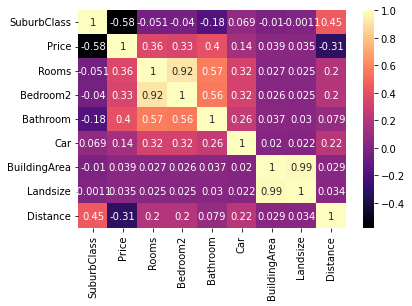

In [ ]:
sb.heatmap(final_df.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()

Rooms highly correlated, but also Landsite and BuildingArea, which might be affected by the data transformation. In general it looks sensible.

In [ ]:
fig = px.histogram(final_df['Price'])
fig.update_layout(
    title_text='Price distribution',
    font=dict(
            family="Times New Roman"
        ),
    xaxis=dict(
        title='Price'),
    yaxis=dict(
        title='Count'),
    showlegend=False
)
fig.show()

In [ ]:
final_df.info()
final_df.describe()
final_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10503 entries, 0 to 13579
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SuburbClass   10503 non-null  int64  
 1   Price         10503 non-null  float64
 2   Rooms         10503 non-null  int64  
 3   Bedroom2      10503 non-null  float64
 4   Bathroom      10503 non-null  float64
 5   Car           10503 non-null  float64
 6   BuildingArea  10503 non-null  float64
 7   Landsize      10503 non-null  float64
 8   Distance      10503 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 820.5 KB


,SuburbClass,Price,Rooms,Bedroom2,Bathroom,Car,BuildingArea,Landsize,Distance
0,1,1480000.0,2,2.0,1.0,1.0,80.2,202.0,2.5
1,1,1035000.0,2,2.0,1.0,0.0,79.0,156.0,2.5
2,1,1465000.0,3,3.0,2.0,0.0,150.0,134.0,2.5
3,1,850000.0,3,3.0,2.0,1.0,37.3,94.0,2.5
4,1,1600000.0,4,3.0,1.0,2.0,142.0,120.0,2.5


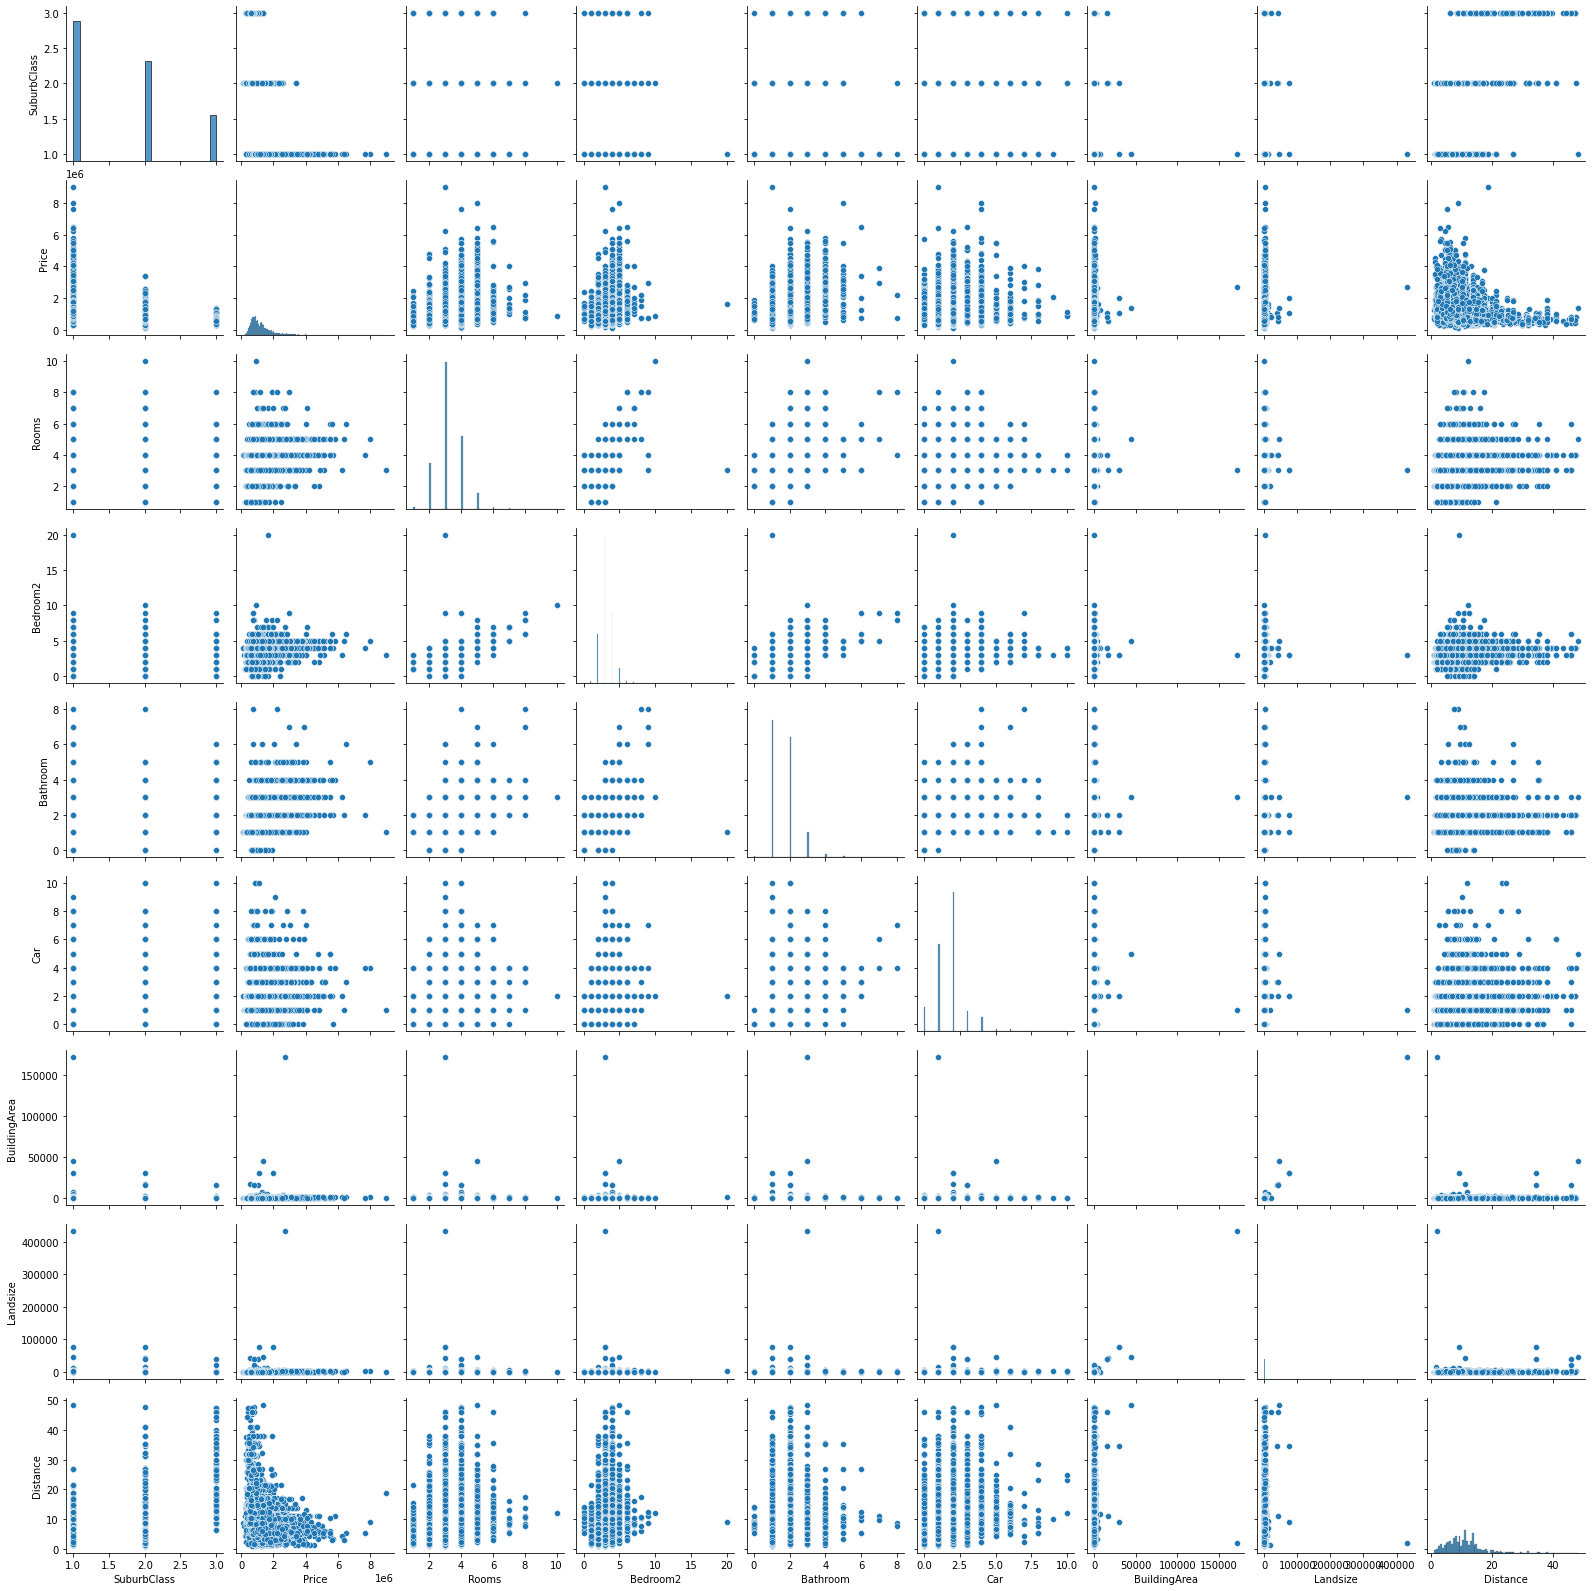

In [ ]:
sb.pairplot(final_df)

## Key findings
- Distance to city centre decreases with higher cost of property
- Landsize and Building Area surprisingly don't seem to show any strong relation to price
- As expected suburbs with lower mean prices don't house expensive real estate 

In [ ]:
# balance properties on base of some features for test, val, train
# 70 train 20 val 10 test

X = final_df.drop(columns='Price')
y = final_df['Price']

# no stratify as this is no classification problem
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=0)

print(cl('X_train: ', attrs = ['bold']), X_train.head(), X_train.shape)
print(cl('y_train: ', attrs = ['bold']), y_train.head(), y_train.shape)
print('----------------------------------------------------------------------------------')
print(cl('X_val: ', attrs = ['bold']), X_val.head(), X_val.shape)
print(cl('y_val: ', attrs = ['bold']), y_val.head(), y_val.shape)
print('----------------------------------------------------------------------------------')
print(cl('X_test: ', attrs = ['bold']), X_test.head(), X_test.shape)
print(cl('y_test: ', attrs = ['bold']), y_test.head(), y_test.shape)

X_train:         SuburbClass  Rooms  Bedroom2  ...  BuildingArea  Landsize  Distance
2375             1      4       4.0  ...         193.0     554.0       8.0
9848             3      5       5.0  ...         199.7     646.0      20.6
1585             1      2       2.0  ...          48.4     122.0       7.8
10410            2      3       3.0  ...         334.3     842.0      16.2
8742             2      3       3.0  ...         384.3     968.0      25.0

[5 rows x 8 columns] (8402, 8)
y_train:  2375     1402000.0
9848      680000.0
1585      620000.0
10410    1130000.0
8742      642000.0
Name: Price, dtype: float64 (8402,)
----------------------------------------------------------------------------------
X_val:         SuburbClass  Rooms  Bedroom2  ...  BuildingArea  Landsize  Distance
1449             2      3       3.0  ...         123.0     157.0       5.9
11105            2      3       3.0  ...         152.0     159.0       6.4
2194             1      3       3.0  ...         27

In [ ]:
final_df.to_csv('final_melb_df.csv', encoding='utf-8', index=False)